In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df=pd.read_csv(r"C:\Users\prabh\Downloads\airbnb_project\data\listing_1.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248508 entries, 0 to 248507
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood_cleansed          248508 non-null  object 
 1   property_type                   248508 non-null  object 
 2   accommodates                    248508 non-null  int64  
 3   bathrooms_text                  248376 non-null  float64
 4   bedrooms                        246462 non-null  float64
 5   beds                            248308 non-null  float64
 6   price                           248470 non-null  float64
 7   minimum_nights                  248508 non-null  int64  
 8   maximum_nights                  248508 non-null  int64  
 9   minimum_nights_avg_ntm          248508 non-null  float64
 10  maximum_nights_avg_ntm          248508 non-null  float64
 11  availability_30                 248508 non-null  int64  
 12  number_of_review

In [68]:
df = df.dropna(subset=['bedrooms','bathrooms_text', 'beds'])

In [69]:
# Convert month column to the desired format (YYYY-MM-DD)
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')

In [70]:
df['month'].unique()

<DatetimeArray>
['2024-09-01 00:00:00', '2024-08-01 00:00:00', '2024-07-01 00:00:00',
 '2024-06-01 00:00:00', '2024-05-01 00:00:00', '2024-04-01 00:00:00',
 '2024-03-01 00:00:00', '2024-02-01 00:00:00', '2024-01-01 00:00:00',
 '2023-12-01 00:00:00', '2023-11-01 00:00:00', '2023-10-01 00:00:00']
Length: 12, dtype: datetime64[ns]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246186 entries, 0 to 248507
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   neighbourhood_cleansed          246186 non-null  object        
 1   property_type                   246186 non-null  object        
 2   accommodates                    246186 non-null  int64         
 3   bathrooms_text                  246186 non-null  float64       
 4   bedrooms                        246186 non-null  float64       
 5   beds                            246186 non-null  float64       
 6   price                           246186 non-null  float64       
 7   minimum_nights                  246186 non-null  int64         
 8   maximum_nights                  246186 non-null  int64         
 9   minimum_nights_avg_ntm          246186 non-null  float64       
 10  maximum_nights_avg_ntm          246186 non-null  float64     

In [72]:
df['month'].unique()

<DatetimeArray>
['2024-09-01 00:00:00', '2024-08-01 00:00:00', '2024-07-01 00:00:00',
 '2024-06-01 00:00:00', '2024-05-01 00:00:00', '2024-04-01 00:00:00',
 '2024-03-01 00:00:00', '2024-02-01 00:00:00', '2024-01-01 00:00:00',
 '2023-12-01 00:00:00', '2023-11-01 00:00:00', '2023-10-01 00:00:00']
Length: 12, dtype: datetime64[ns]

In [73]:
print(df.describe())

        accommodates  bathrooms_text       bedrooms           beds  \
count  246186.000000   246186.000000  246186.000000  246186.000000   
mean        3.136425        1.287743       1.462569       1.669644   
min         1.000000        0.000000       0.000000       0.000000   
25%         2.000000        1.000000       1.000000       1.000000   
50%         2.000000        1.000000       1.000000       1.000000   
75%         4.000000        1.500000       2.000000       2.000000   
max        16.000000       49.000000      50.000000      12.000000   
std         1.992593        0.613469       0.927584       1.102986   

               price  minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
count  246186.000000   246186.000000   246186.000000           246186.000000   
mean      186.504516       25.051282      494.130085               25.448686   
min         1.000000        1.000000        1.000000                1.000000   
25%        80.000000        3.000000       90.000

In [74]:
df['Price_Range'] = pd.cut(df['price'], bins=[0,150,300,500,1000, df['price'].max()])
price_category = df['Price_Range'].value_counts().sort_index()

In [75]:
price_category

Price_Range
(0.0, 150.0]         140438
(150.0, 300.0]        76157
(300.0, 500.0]        20360
(500.0, 1000.0]        7464
(1000.0, 13706.0]      1767
Name: count, dtype: int64

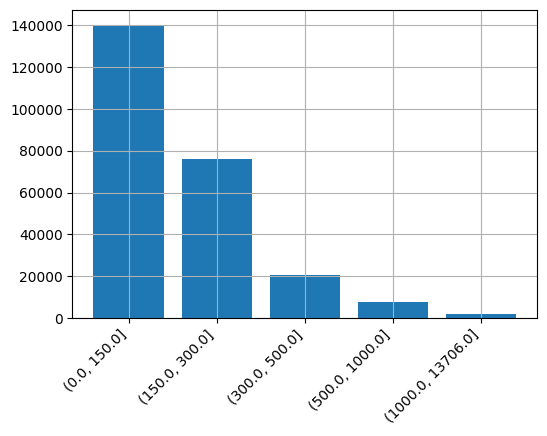

In [76]:
plt.figure(figsize=(6,4))
plt.bar(price_category.index.astype('str'), price_category.values )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid()
plt.show()

In [77]:
df['data_year'] = df['month'].dt.year
df['data_month'] = df['month'].dt.month

# Drop the original datetime column
df = df.drop(columns=['month'])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the bins and labels
bins = [0, 150, 300, 500, 1000, df['price'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'Price_Range' in the DataFrame
df['Price_Range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Create five DataFrames based on the price range
df_1 = df[df['Price_Range'] == 'Very Low']
df_2 = df[df['Price_Range'] == 'Low']
df_3 = df[df['Price_Range'] == 'Medium']
df_4 = df[df['Price_Range'] == 'High']
df_5 = df[df['Price_Range'] == 'Very High']

# Define the columns to scale
standard_scaler_columns = [ 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
                           'maximum_nights_avg_ntm', 'availability_30', 'number_of_reviews',
                           'review_scores_rating', 'calculated_host_listings_count', 'property',
                           'count_amenities', 'data_year', 'data_month']

min_max_scaler_columns = ['accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'instant_bookable',
                          'new_host', 'host_response_score', 'host_score', 'property_description_score']

# Define the columns to one-hot encode
one_hot_encode_columns = ['neighbourhood_cleansed', 'property_type']

# Function to scale and split the data
def scale_and_split(df, standard_scaler_columns, min_max_scaler_columns, one_hot_encode_columns):
    # Standard Scaler
    standard_scaler = StandardScaler()
    df[standard_scaler_columns] = standard_scaler.fit_transform(df[standard_scaler_columns])

    # MinMax Scaler
    min_max_scaler = MinMaxScaler()
    df[min_max_scaler_columns] = min_max_scaler.fit_transform(df[min_max_scaler_columns])

    # One-hot encoding
    df = pd.get_dummies(df, columns=one_hot_encode_columns)

    # Split the data into features and target
    X = df.drop(['price', 'Price_Range'], axis=1)
    y = df['price']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

# Scale and split each dataset
X_train_1, X_test_1, y_train_1, y_test_1 = scale_and_split(df_1, standard_scaler_columns, min_max_scaler_columns, one_hot_encode_columns)
X_train_2, X_test_2, y_train_2, y_test_2 = scale_and_split(df_2, standard_scaler_columns, min_max_scaler_columns, one_hot_encode_columns)
X_train_3, X_test_3, y_train_3, y_test_3 = scale_and_split(df_3, standard_scaler_columns, min_max_scaler_columns, one_hot_encode_columns)
X_train_4, X_test_4, y_train_4, y_test_4 = scale_and_split(df_4, standard_scaler_columns, min_max_scaler_columns, one_hot_encode_columns)
X_train_5, X_test_5, y_train_5, y_test_5 = scale_and_split(df_5, standard_scaler_columns, min_max_scaler_columns, one_hot_encode_columns)



C:\Users\prabh\AppData\Local\Temp\ipykernel_9612\3028886436.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[standard_scaler_columns] = standard_scaler.fit_transform(df[standard_scaler_columns])
C:\Users\prabh\AppData\Local\Temp\ipykernel_9612\3028886436.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[min_max_scaler_columns] = min_max_scaler.fit_transform(df[min_max_scaler_columns])
C:\Users\prabh\AppData\Local\Temp\ipykernel_9612\3028886436.py:34: SettingWithCopyWarning: 
A value is trying t

In [79]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = XGBRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return model, rmse, mse, mae, r2

# Train and evaluate the model for each dataset
model_1, rmse_1, mse_1, mae_1, r2_1 = train_and_evaluate(X_train_1, X_test_1, y_train_1, y_test_1)
model_2, rmse_2, mse_2, mae_2, r2_2 = train_and_evaluate(X_train_2, X_test_2, y_train_2, y_test_2)
model_3, rmse_3, mse_3, mae_3, r2_3 = train_and_evaluate(X_train_3, X_test_3, y_train_3, y_test_3)
model_4, rmse_4, mse_4, mae_4, r2_4 = train_and_evaluate(X_train_4, X_test_4, y_train_4, y_test_4)
model_5, rmse_5, mse_5, mae_5, r2_5 = train_and_evaluate(X_train_5, X_test_5, y_train_5, y_test_5)


In [80]:
evaluation_results = pd.DataFrame({
    'Price_Range': ['Very Low', 'Low', 'Medium', 'High', 'Very High'],
    'RMSE': [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5],
    'MSE': [mse_1, mse_2, mse_3, mse_4, mse_5],
    'MAE': [mae_1, mae_2, mae_3, mae_4, mae_5],
    'R2 Score': [r2_1, r2_2, r2_3, r2_4, r2_5]
})

print(evaluation_results)


  Price_Range        RMSE            MSE         MAE  R2 Score
0    Very Low   18.594315     345.748549   14.208101  0.686378
1         Low   31.154093     970.577487   23.959453  0.449028
2      Medium   44.245997    1957.708254   33.544075  0.415486
3        High   95.929539    9202.476431   68.113008  0.596299
4   Very High  919.492248  845465.994229  342.992044  0.796843


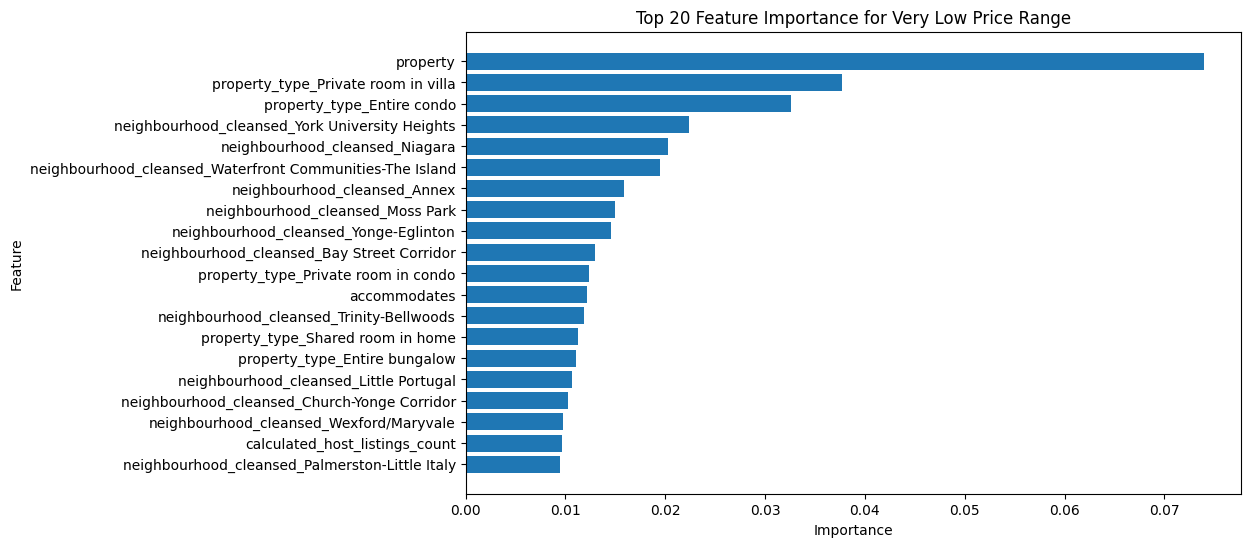

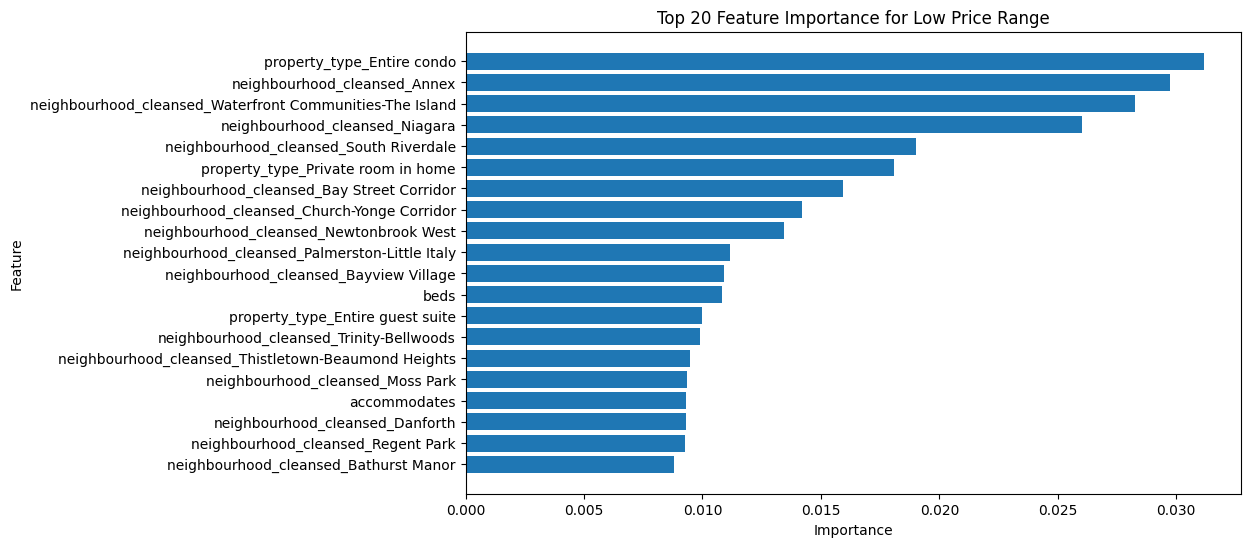

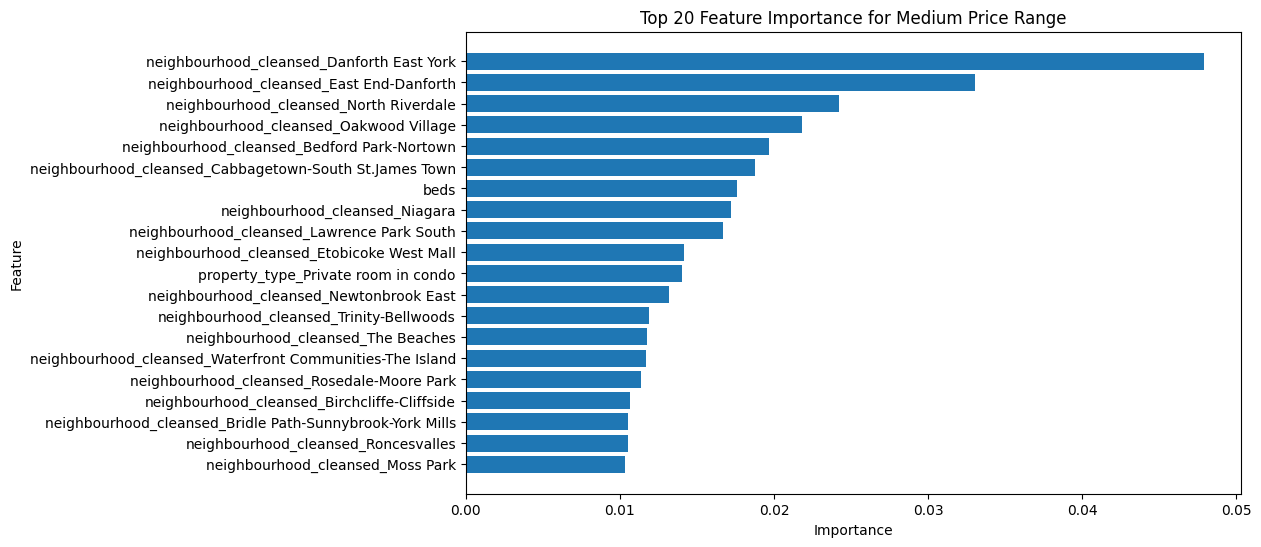

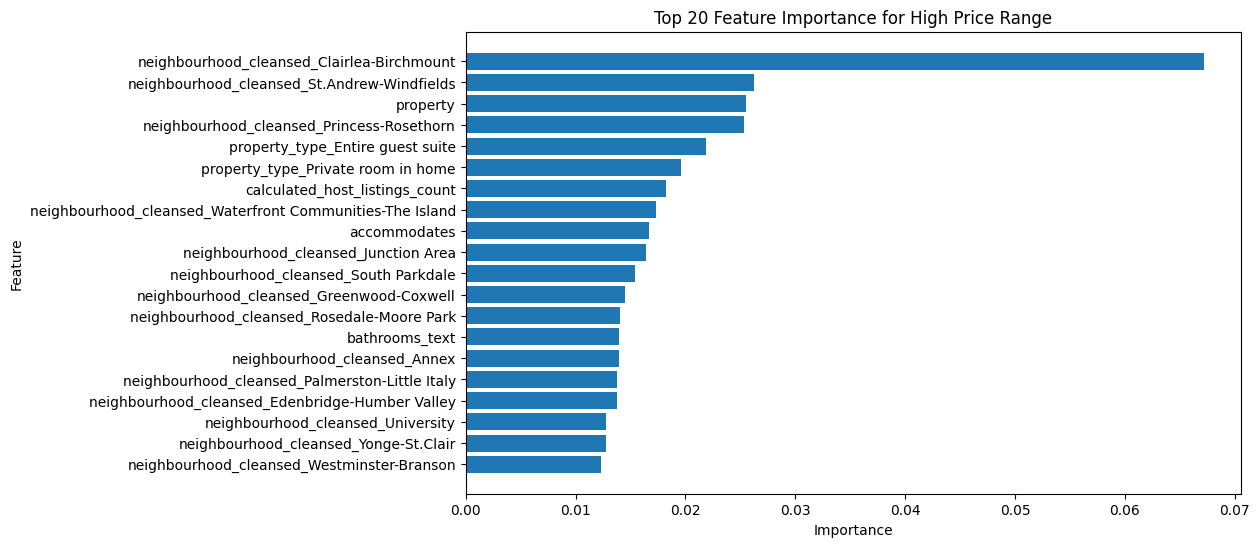

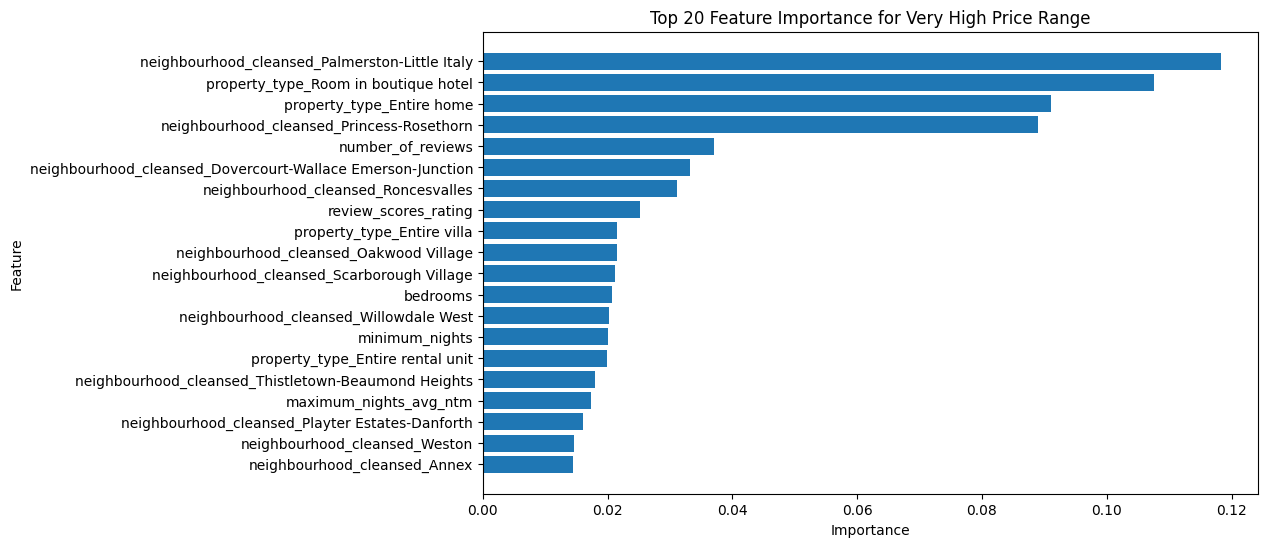

In [81]:
# Function to get feature importance
def get_feature_importance(model, X_train, top_n=20):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    return feature_importance.head(top_n)

# Get feature importance for each model
feature_importance_1 = get_feature_importance(model_1, X_train_1)
feature_importance_2 = get_feature_importance(model_2, X_train_2)
feature_importance_3 = get_feature_importance(model_3, X_train_3)
feature_importance_4 = get_feature_importance(model_4, X_train_4)
feature_importance_5 = get_feature_importance(model_5, X_train_5)

# Plot feature importance for each model
def plot_feature_importance(feature_importance, title):
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

plot_feature_importance(feature_importance_1, 'Top 20 Feature Importance for Very Low Price Range')
plot_feature_importance(feature_importance_2, 'Top 20 Feature Importance for Low Price Range')
plot_feature_importance(feature_importance_3, 'Top 20 Feature Importance for Medium Price Range')
plot_feature_importance(feature_importance_4, 'Top 20 Feature Importance for High Price Range')
plot_feature_importance(feature_importance_5, 'Top 20 Feature Importance for Very High Price Range')


In [82]:
df

,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,...,calculated_host_listings_count,property,new_host,host_response_score,host_score,property_description_score,count_amenities,Price_Range,data_year,data_month
0,Little Portugal,Entire home,10,3.0,5.000000,4.571429,370.850000,28,730,28.0,...,1,12,0,0,4,2,173,Medium,2024,9
1,Waterfront Communities-The Island,Private room in rental unit,2,1.5,1.044053,0.977707,156.667769,180,365,180.0,...,2,42,0,0,4,2,146,Low,2024,9
2,Waterfront Communities-The Island,Entire condo,4,1.0,1.000000,2.000000,172.000000,28,1125,28.0,...,5,8,0,7,4,2,830,Low,2024,9
3,South Riverdale,Entire rental unit,1,1.0,0.000000,1.000000,75.000000,90,365,90.0,...,1,16,0,4,5,2,1012,Very Low,2024,9
4,Waterfront Communities-The Island,Entire rental unit,2,1.5,1.000000,0.975925,201.000300,180,365,180.0,...,2,16,0,0,4,2,146,Low,2024,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248503,Clanton Park,Private room in home,1,1.0,1.000000,1.000000,61.000000,28,28,28.0,...,2,37,0,8,5,2,700,Very Low,2023,10
248504,Palmerston-Little Italy,Private room in home,1,1.0,1.000000,1.000000,79.000000,29,365,29.0,...,1,37,0,0,4,2,667,Very Low,2023,10
248505,Woburn,Private room in home,1,1.5,1.000000,1.000000,64.000000,1,365,1.0,...,2,37,0,10,3,2,128,Very Low,2023,10
248506,High Park North,Entire home,6,1.0,3.000000,3.000000,110.000000,30,365,30.0,...,1,12,0,0,4,2,103,Very Low,2023,10


In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
def preprocess_data(df):
  # Drop unnecessary columns
  df = df.drop(columns=['Price_Range'])  # We won't include 'Price_Range' in inputs

  # Separate features and target
  X = df.drop(['price'], axis=1)
  y = df['price']

  # Handle categorical variables
  # Assuming 'instant_bookable' and 'new_host' are categorical
  # If they are already encoded as 0/1, we can proceed; otherwise, encode them
  # If there are other categorical variables, encode them as well

  # One-hot encode 'neighbourhood_cleansed' and 'property_type'
  X = pd.get_dummies(X, columns=['neighbourhood_cleansed', 'property_type'], drop_first=True)

  # Feature Scaling
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Convert y to numpy array
  y = y.values

  return X_scaled, y


In [85]:
def train_mlp_model(X, y):
  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
  )
  
  # Build the MLP model
  model = Sequential()
  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
  model.add(Dense(64, activation='relu'))  # Hidden layer
  model.add(Dense(32, activation='relu'))  # Hidden layer
  model.add(Dense(1))  # Output layer for regression
  
  # Compile the model
  model.compile(loss='mae', optimizer='adam')
  
  early_stopping = EarlyStopping(monitor='val_loss', patience=5)

  # Include in model.fit()
  history = model.fit(
      X_train, y_train,
      validation_split=0.2,
      epochs=100,
      batch_size=32,
      verbose=1,
      callbacks=[early_stopping]
  )
  
  # Evaluate the model
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  
  return model, history, rmse, mse, mae, r2

In [86]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140438 entries, 3 to 248506
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   neighbourhood_cleansed          140438 non-null  object  
 1   property_type                   140438 non-null  object  
 2   accommodates                    140438 non-null  float64 
 3   bathrooms_text                  140438 non-null  float64 
 4   bedrooms                        140438 non-null  float64 
 5   beds                            140438 non-null  float64 
 6   price                           140438 non-null  float64 
 7   minimum_nights                  140438 non-null  float64 
 8   maximum_nights                  140438 non-null  float64 
 9   minimum_nights_avg_ntm          140438 non-null  float64 
 10  maximum_nights_avg_ntm          140438 non-null  float64 
 11  availability_30                 140438 non-null  float64 
 12  number_

In [87]:
# Preprocess data for 'Very Low' price range
X_1, y_1 = preprocess_data(df_1)
model_1, history_1, rmse_1, mse_1, mae_1, r2_1 = train_mlp_model(X_1, y_1)

# Low Price Range
X_2, y_2 = preprocess_data(df_2)
model_2, history_2, rmse_2, mse_2, mae_2, r2_2 = train_mlp_model(X_2, y_2)

# Medium Price Range
X_3, y_3 = preprocess_data(df_3)
model_3, history_3, rmse_3, mse_3, mae_3, r2_3 = train_mlp_model(X_3, y_3)

# High Price Range
X_4, y_4 = preprocess_data(df_4)
model_4, history_4, rmse_4, mse_4, mae_4, r2_4 = train_mlp_model(X_4, y_4)

# Very High Price Range
X_5, y_5 = preprocess_data(df_5)
model_5, history_5, rmse_5, mse_5, mae_5, r2_5 = train_mlp_model(X_5, y_5)

Epoch 1/100


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 25.7784 - val_loss: 16.9139
Epoch 2/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 16.7259 - val_loss: 16.1115
Epoch 3/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 15.8726 - val_loss: 15.4282
Epoch 4/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 15.0777 - val_loss: 14.8951
Epoch 5/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 14.6378 - val_loss: 14.7525
Epoch 6/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 14.0623 - val_loss: 14.6729
Epoch 7/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 13.6983 - val_loss: 13.9956
Epoch 8/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 13.3117 - val_loss: 13.7420
Epoch 9/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 12.9979 - val_loss: 13.6370
Epoch 10/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 12.7223 - val_loss: 13.5689
Epoch 11/100
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 12.5584 - val_loss: 13.3287
Epoch 12/

C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 64.4675 - val_loss: 30.4013
Epoch 2/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 30.0980 - val_loss: 29.4341
Epoch 3/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 28.9936 - val_loss: 29.1239
Epoch 4/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 28.5593 - val_loss: 28.7087
Epoch 5/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 28.1622 - val_loss: 28.1733
Epoch 6/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 27.8173 - val_loss: 27.9697
Epoch 7/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 27.5600 - val_loss: 27.7452
Epoch 8/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 26.7091 - val_loss: 27.2972
Epoch 9/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 26.3355 - val_loss: 26.8947
Epoch 10/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 25.8333 - val_loss: 26.8005
Epoch 11/100
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 25.4325 - val_loss: 26.2018
Epoch 12/

C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


408/408 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 217.3109 - val_loss: 46.7334
Epoch 2/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 45.1377 - val_loss: 44.5200
Epoch 3/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 42.6268 - val_loss: 43.2852
Epoch 4/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41.9616 - val_loss: 42.5057
Epoch 5/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41.4983 - val_loss: 41.6001
Epoch 6/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 40.2443 - val_loss: 41.3365
Epoch 7/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 40.0378 - val_loss: 41.7818
Epoch 8/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 39.3133 - val_loss: 40.6717
Epoch 9/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 38.7485 - val_loss: 40.9536
Epoch 10/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 38.3284 - val_loss: 40.8200
Epoch 11/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 38.7579 - val_loss: 40.0882
Epoch 12/100
408/408 ━━━━━━━━━

C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 599.8229 - val_loss: 115.1404
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 106.2448 - val_loss: 98.8991
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 91.5983 - val_loss: 96.0228
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89.6948 - val_loss: 94.4225
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 84.0430 - val_loss: 93.0468
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 85.0557 - val_loss: 92.2002
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 84.0165 - val_loss: 91.0427
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79.7012 - val_loss: 90.5117
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 81.3884 - val_loss: 90.6325
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 79.0613 - val_loss: 89.9872
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 77.5666 - val_loss: 89.5173
Epoch 12/100
150/150 ━━━━━━━

C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2440.9561 - val_loss: 2212.6492
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2435.3611 - val_loss: 2015.1708
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1912.1681 - val_loss: 1249.7009
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1285.4460 - val_loss: 874.0871
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1007.5197 - val_loss: 816.0533
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1034.6135 - val_loss: 783.6041
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 933.5480 - val_loss: 759.6057
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 868.8112 - val_loss: 738.6548
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 923.9453 - val_loss: 716.9982
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 783.0706 - val_loss: 693.9748
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 797.9817 - val_loss: 674.3336
Epoch 12/100
36/36 ━━

In [88]:
evaluation_results = pd.DataFrame({
  'Price_Range': ['Very Low', 'Low', 'Medium', 'High', 'Very High'],
  'RMSE': [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5],
  'MSE': [mse_1, mse_2, mse_3, mse_4, mse_5],
  'MAE': [mae_1, mae_2, mae_3, mae_4, mae_5],
  'R2 Score': [r2_1, r2_2, r2_3, r2_4, r2_5]
})

print(evaluation_results)

  Price_Range         RMSE           MSE         MAE  R2 Score
0    Very Low    16.714249  2.793661e+02   11.131473  0.746592
1         Low    55.426928  3.072144e+03   23.774301 -0.743978
2      Medium    51.215771  2.623055e+03   37.377553  0.216833
3        High   109.841162  1.206508e+04   72.461587  0.470721
4   Very High  1568.460149  2.460067e+06  595.838378  0.408870


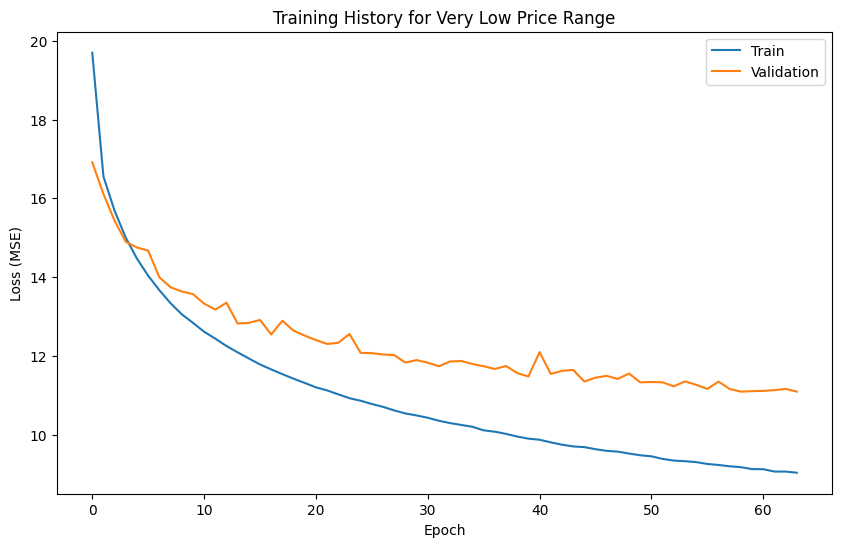

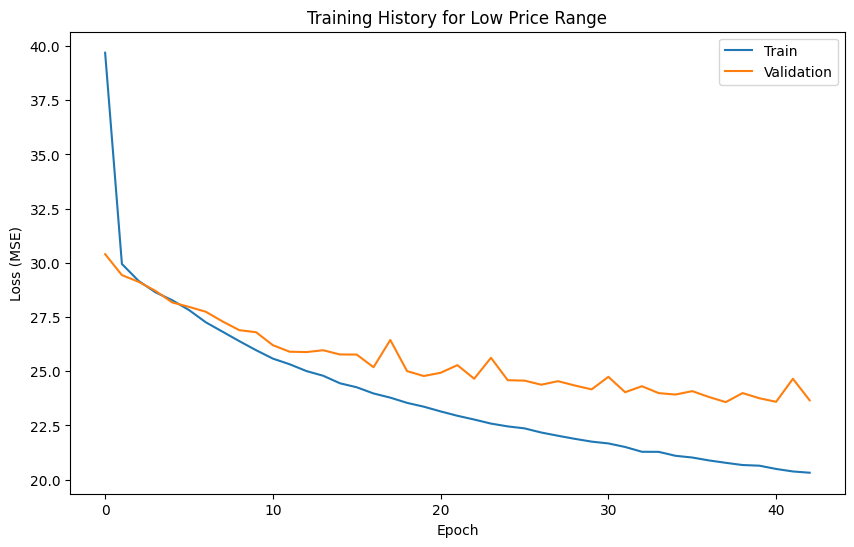

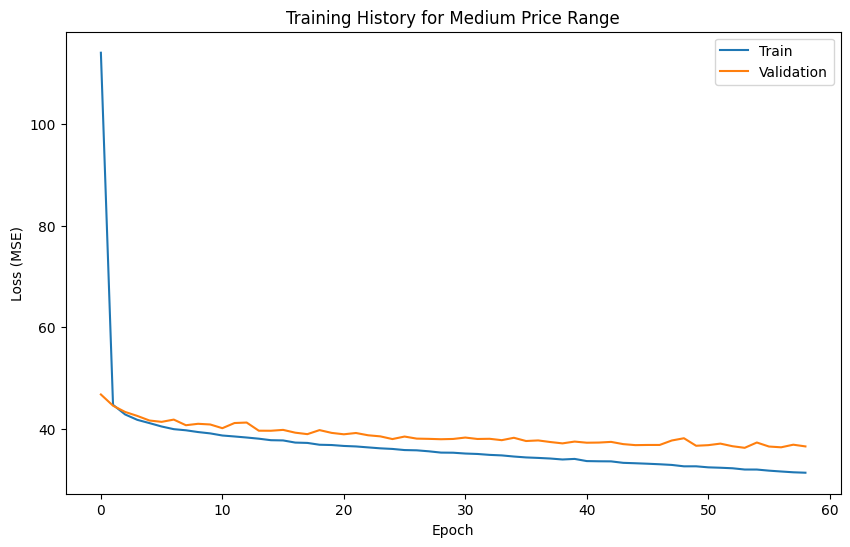

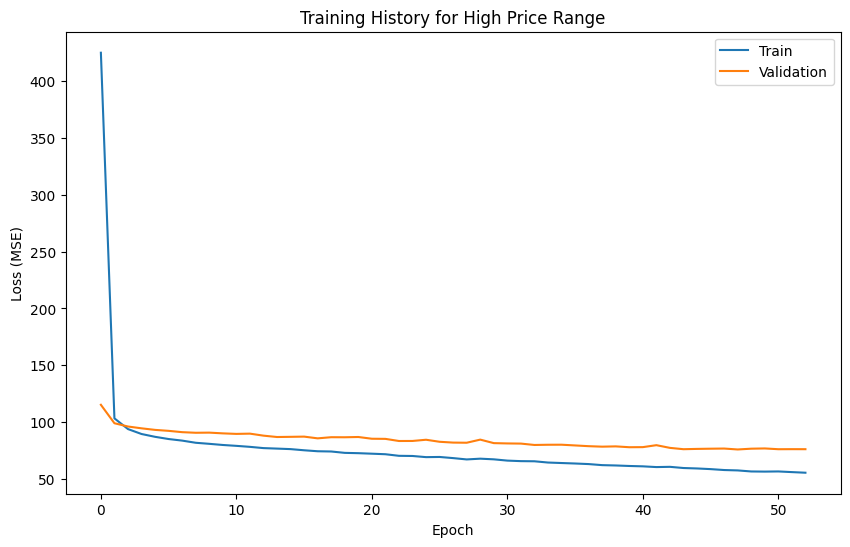

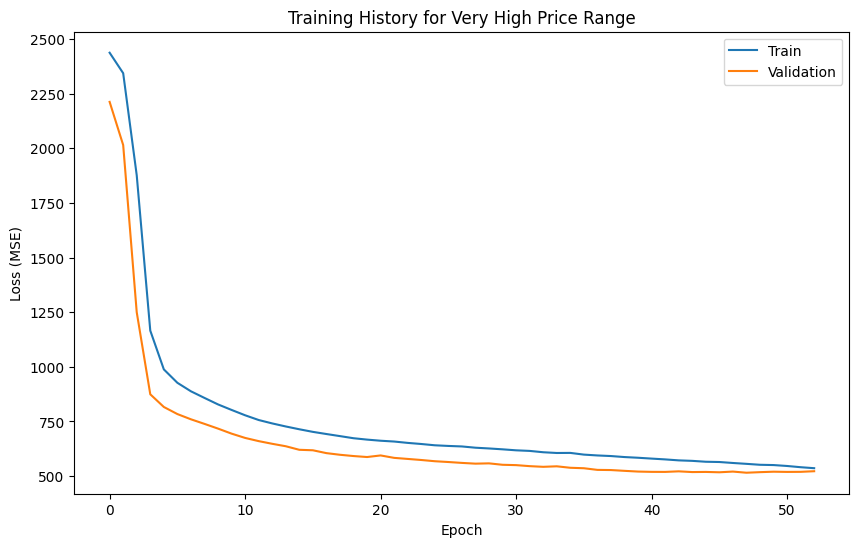

In [89]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.title(title)
  plt.ylabel('Loss (MSE)')
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.show()

# Plot for 'Very Low' Price Range
plot_training_history(history_1, 'Training History for Very Low Price Range')

# Similarly for other price ranges
plot_training_history(history_2, 'Training History for Low Price Range')
plot_training_history(history_3, 'Training History for Medium Price Range')
plot_training_history(history_4, 'Training History for High Price Range')
plot_training_history(history_5, 'Training History for Very High Price Range')